## 字符串总结
#### 字符串的基础操作：切分，关联等，总结：TODO
#### 作为一种基础数据结构，可以和很多算法结合起来，KMP匹配略难
#### 参考[代码随想录-哈希表](https://programmercarl.com/0344.%E5%8F%8D%E8%BD%AC%E5%AD%97%E7%AC%A6%E4%B8%B2.html#%E5%85%B6%E4%BB%96%E8%AF%AD%E8%A8%80%E7%89%88%E6%9C%AC),[cs-note-哈希表](http://www.cyc2018.xyz/%E7%AE%97%E6%B3%95/Leetcode%20%E9%A2%98%E8%A7%A3/Leetcode%20%E9%A2%98%E8%A7%A3%20-%20%E5%AD%97%E7%AC%A6%E4%B8%B2.html#_1-%E5%AD%97%E7%AC%A6%E4%B8%B2%E5%BE%AA%E7%8E%AF%E7%A7%BB%E4%BD%8D%E5%8C%85%E5%90%AB)

In [19]:
# 求next数组
def getnext(needle):
    next = ['' for i in range(len(needle))]
    k = -1
    next[0] = k # 初始化第一个为-1
    
    for i in range(1, len(needle)):
        while (k > -1 and needle[k+1] != needle[i]):
            k = next[k]
        if needle[k+1] == needle[i]:
            k += 1
        next[i] = k
    return next

needle = "issip"
getnext(needle)

[-1, -1, -1, 0, -1]

### LC. 344 [反转字符串](https://leetcode.cn/problems/reverse-string/)
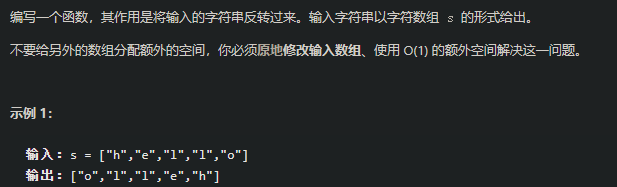

In [4]:
def lc344(s):
    start,end = 0,len(s)-1
    while start<end:
            s[start],s[end] = s[end],s[start]
            start += 1
            end -= 1
    return s
lc344(["h","e","l","l","o"])

['o', 'l', 'l', 'e', 'h']

### LC. 541 [ 反转字符串 II](https://leetcode.cn/problems/reverse-string-ii/)
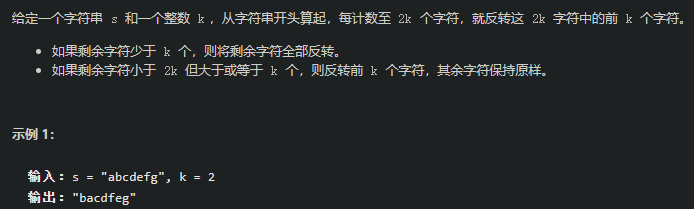

In [5]:
# 1. 字符串不能原地修改，要先转换为数组在进行计算
# 2. 普通思路：双指针模拟：一次跳2k个，然后反转前K个
def lc541(s,k):
    s = list(s) # 字符串是不支持拆分操作的
    def reverse(str1):
        s,e = 0,len(str1)-1
        while s<e:
            str1[s],str1[e] = str1[e],str1[s]
            s += 1
            e -= 1
        return str1

    # 双指针
    start,end = 0,2*k
    while end < len(s):
        # print(start,end)
        s[start:start+k] = reverse(s[start:start+k])
        start = end
        end += 2*k

    # 处理剩下的那一段
    if start + k <= len(s)-1:
        s[start:start+k] = reverse(s[start:start+k])
    else:
        s[start:] = reverse(s[start:])

    return ''.join(s)

s = "abcdefg";k = 2
lc541(s,k)

'bacdfeg'

### LC. 242 [有效的字母异位词](https://leetcode.cn/problems/valid-anagram/description/)
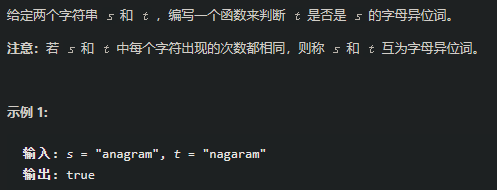

In [13]:
def lc242(s,t):
    dic = {}
    for s_ in s:
        dic[s_] = dic.get(s_,0) + 1
    for t_ in t:
        dic[t_] = dic.get(t_,0) - 1
    for d in dic:
        if dic[d] != 0:return False
    return True

lc242("anagram","nagaram")

True

### LC. 409 [最长回文串](https://leetcode.cn/problems/longest-palindrome/description/)
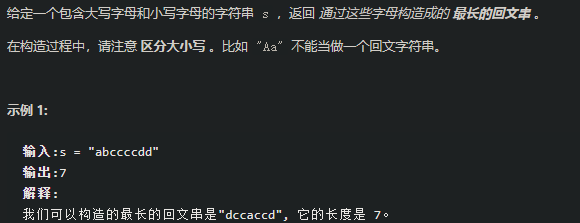

In [14]:
# 结果由两部分构成，一部分记录每个字母能贡献多少，一个记录是不是最后要就加1
def lc409(s):
    res = 0
    label = 0
    dic = {}
    for s_ in s:
        dic[s_] = dic.get(s_,0)+1
    for d in dic:
        if dic[d] % 2 == 1:
            label = 1
            res += (dic[d]-1)
        else:
            res += dic[d]
    return res+label

lc409("abccccdd")

7

### LC. 205 [同构字符串](https://leetcode.cn/problems/isomorphic-strings/description/)
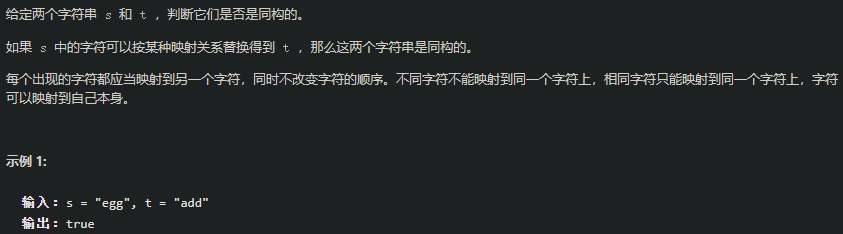

In [15]:
#  将字符映射到数字
def lc205(s,t):
    k1,k2 = 0,0
    k_set1,k_set2 = {},{} # 记录用过的数字
    res1, res2 = [],[]

    for s_,t_ in zip(s,t):
        if s_ not in k_set1:
            k_set1[s_] = k1
            res1.append(k1)
            k1 += 1
        else:
            res1.append(k_set1[s_])

        if t_ not in k_set2:
            k_set2[t_] = k2
            res2.append(k2)
            k2 += 1
        else:
            res2.append(k_set2[t_])

        if res1[-1] != res2[-1]:
            return False
    return True

lc205('add','egg')

True

### LC. 9 [回文数](https://leetcode.cn/problems/palindrome-number/description/)
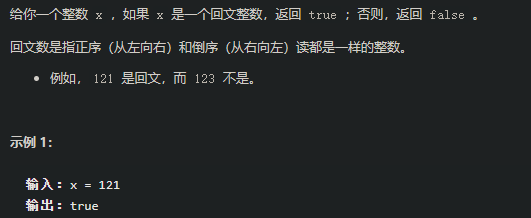

In [17]:
# 将数字转换为字符串
def lc9(x):
    x = str(x)
    s,e = 0,len(x)-1
    while s<e:
        if x[s] != x[e]:
            return False
        else:
            s += 1
            e -= 1
    return True
lc9(121)

True

### LC. 696 [计数二进制子串](https://leetcode.cn/problems/count-binary-substrings/description/)
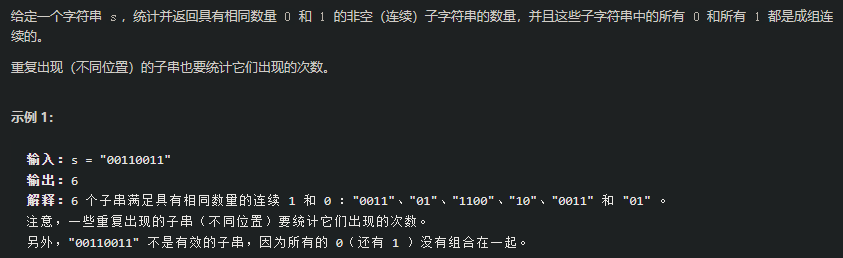

In [18]:
# 遍历模拟，需要注意的点较多
def lc696(s):
    e=0         # 遍历字符串
    label = -1  # 标记是否要计算res
    res = 0
    dic = {     # 记录遍历中0/1的个数
        '0':0,
        '1':0
    }
    while e<len(s):
        if e==0 or s[e] == s[e-1]:
            dic[s[e]] += 1
            e += 1
        else: 
            label += 1
            if label == 1:
                label = 0
                res += min(dic['0'],dic['1'])
                # print(dic,res)
                dic[s[e]] = 1
                e += 1
            else:
                dic[s[e]] += 1
                e += 1
    res += min(dic['0'],dic['1'])
    return res

lc696("00110011")

6

### Lc. 05 [替换空格](https://leetcode.cn/problems/ti-huan-kong-ge-lcof/)
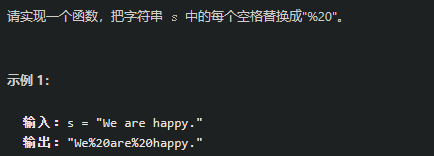

In [6]:
# str.count()计算str中某字符的出现次数
# 从后往前
def lc05(s):
    count = s.count(' ')
    list_s = list(s)
    list_s += [' ' for i in range(2*count)]

    e1 = len(list_s)-1
    e = len(s) - 1
    while e>=0:
        if s[e] != ' ':
            list_s[e1] = s[e]
            e1 -= 1
        else:
            list_s[e1-2:e1+1] = '%20'
            e1 -= 3
        e -= 1
    return ''.join(list_s)

lc05("We are happy.")

'We%20are%20happy.'

### LC. 151 [反转字符串中的单词](https://leetcode.cn/problems/reverse-words-in-a-string/)
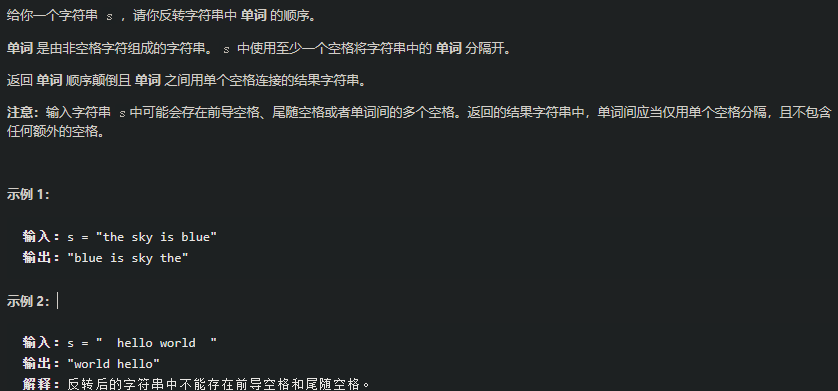

In [7]:
# 前后去重
# 整体翻转
# 单词翻转
# 单词间去重
def lc151(s):
    # 整体翻转
    s = list(s)
    s = s[::-1]

    # 删除两侧的空格
    start,end = 0,len(s)-1
    while start < end and s[start] == ' ':
        start += 1
    while start < end and s[end] == ' ':
        end -= 1
    s = s[start:end+1]

    # 翻转每一个单词
    def reverse(str1):
        s,e = 0,len(str1)-1
        while s < e:
            str1[s],str1[e] = str1[e],str1[s]
            s += 1
            e -= 1
        return str1

    start,end = 0,0
    res = []
    while end < len(s):
        while end < len(s) and s[end] != ' ':
            end += 1
        s[start:end] = reverse(s[start:end])
        res += s[start:end]
        res.append(' ')
        # 找到下一个不为空格的
        while end < len(s) and s[end] == ' ':
            end += 1
        start = end
    return ''.join(res[:-1])

lc151("a good   example  ")

'example good a'

### LC. 58 [左旋转字符串](https://leetcode.cn/problems/zuo-xuan-zhuan-zi-fu-chuan-lcof/)
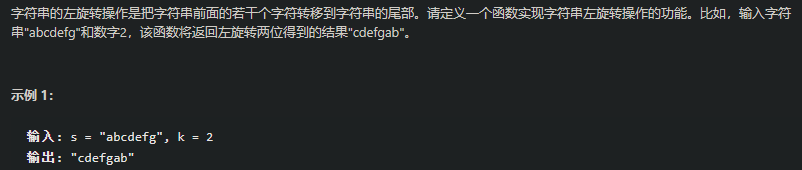

In [9]:
# 正常思路：先整体翻转，在翻转前k个和剩下的
# 皮一下
def lc58(s,n):
    # 真正做法是翻转，"abcdefg" -> "gfedcba" -> "cdefgab"
    return s[n:] + s[:n]
lc58("abcdefg",2)

'cdefgab'

### LC. 28 [找出字符串中第一个匹配项的下标](https://leetcode.cn/problems/find-the-index-of-the-first-occurrence-in-a-string/)
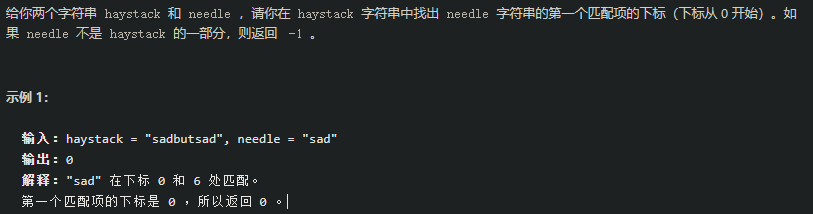

In [10]:
# KMP匹配，思路好理解，关键是求next数组的过程，太难顶了
# 详见https://programmercarl.com/0028.%E5%AE%9E%E7%8E%B0strStr.html
def lc28(haystack,needle):
    # nex数组：最长相同前后缀计算
    def getnex(needle):
        nex = [0 for i in range(len(needle))]
        k = -1
        nex[0] = k

        for i in range(1, len(needle)):
            while (k > -1 and needle[k+1] != needle[i]): # while和if的顺序是不能变的，否则可能会出错
                k = nex[k]
            if needle[k+1] == needle[i]:
                k += 1
            nex[i] = k

        return nex

    len_h,len_n = len(haystack),len(needle)
    nex = getnex(needle)
    print(nex)

    k = -1
    for i in range(len_h):
        while k > -1 and needle[k+1] != haystack[i]:
            k = nex[k]
        if needle[k+1] == haystack[i]:
            k += 1
        if k == len_n-1:
            return i-len_n+1
    return -1
lc28("sadbutsad",'sad')

[-1, -1, -1]


0

### LC.459 [重复的子字符串](https://leetcode.cn/problems/repeated-substring-pattern/)
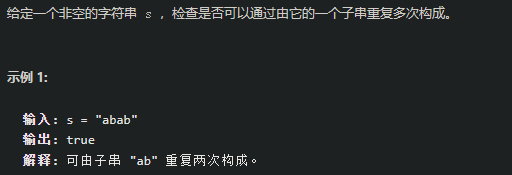
### next数组的应用，详见:1,2,3,4,5,6部分能分别推出互相相等
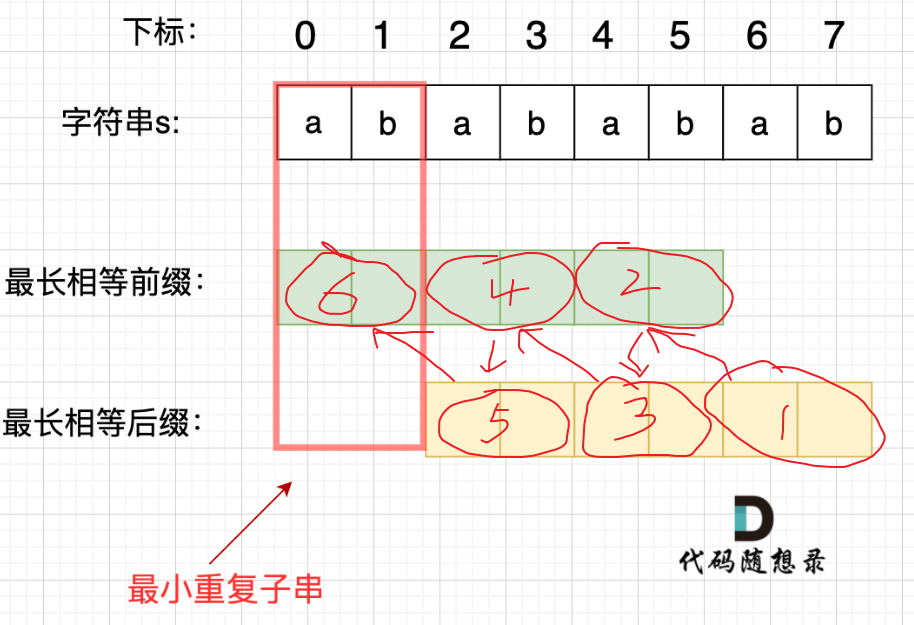

In [12]:
def lc459(s):
    # 最长相等前后缀
    k = -1
    res = [-1 for i in range(len(s))]

    for i in range(1,len(s)):
        while k>-1 and s[k+1] != s[i]:
            k = res[k]
        if s[k+1] == s[i]:
            k += 1
        res[i] = k
    print(res[-1])
    return len(s) % (len(s)-(res[-1]+1)) == 0 and res[-1] >= 0 #最长相等前后缀不包含的子串就是最小重复子串
lc459("abcabcabcabc")

8


True

[-1, -1, -1, 0, -1]

In [12]:
needle = 'aabaabaac'
nex = [0 for i in range(len(needle))]
k = -1 # 标志位
nex[0] = k

for i in range(1,len(needle)):
    # 前后缀不等的时候
    while k > -1 and needle[k+1] != needle[i]:  # 因为k可能往后退，所以必然不会超过i
        k = nex[k]
    # 前后缀相等的时候
    if needle[k+1] == needle[i]:
        k += 1
    nex[i] = k
nex

[-1, 0, -1, 0, 1, 2, 3, 4, -1]